# Assignment
## Assignment Instructions
In this assignment you will implement OpenCV's cvtColor function from scratch for the following conversions:

1. **convertBGRtoGray** function for converting BGR image to Grayscale image

2. **convertBGRtoHSV** function for converting BGR image to HSV image

You will get a total of 5 attempts in this assignment and the submissions will be auto-graded.

Grading Rubric
1. **convertBGRtoGray** function - 10 points

2. **convertBGRtoHSV** function - 20 points

# <font style="color:rgb(50,120,229)">Objective </font>
You have seen how we convert from one color space to another and also the theory behind the color spaces. In this assignment, you will implement the function cvtColor using the conversion formulae given in the opencv website. Specifically, you will be implementing the 2 functions:
1. convertBGRtoGray ( 10 points )
1. convertBGRtoHSV ( 20 points )

We have created the outline of the functions along with the supporting code. You just have to implement the formula in the function.

**Parameters**

**Input**
- BGR image ( named img )

**Output**
- Gray or HSV image

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
img = cv2.imread(DATA_PATH+"images/sample.jpg")

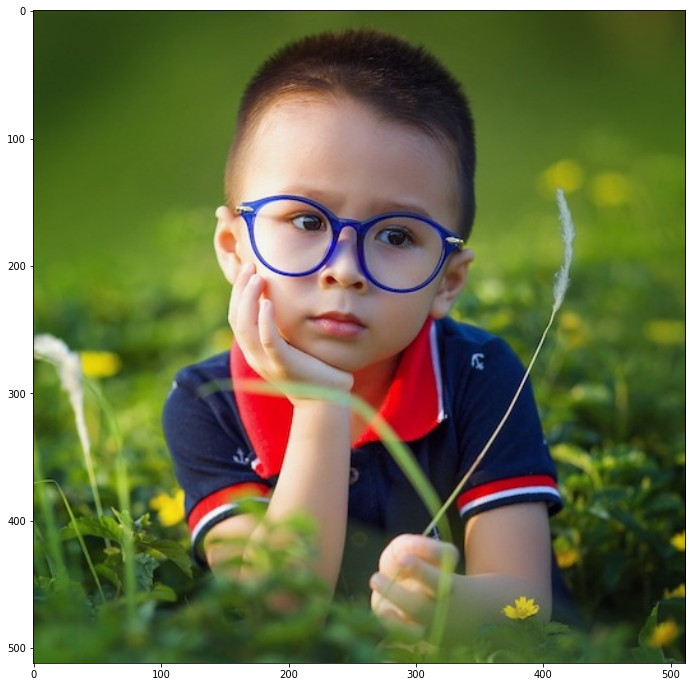

In [5]:
plt.imshow(img[:,:,::-1])
plt.show()

#### <font style="color:rgb(50,120,229)">Convert BGR image to Grayscale image</font>
- Input: image in BGR mode
- Output: image in grayscale mode

For your convenience, we have added the conversion formula below
![BGR to Gray formula](https://www.dropbox.com/s/2zuuigf5cpocs75/bgr2gray_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html


img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray

In [8]:
def convertBGRtoGray(image):
    B,G,R = cv2.split(image)
    grayimg = np.round(0.299*R + 0.587*G + 0.114*B)
    grayimg = grayimg.astype(np.uint8)
    return grayimg

gray = convertBGRtoGray(img)
gray

array([[61, 61, 60, ..., 60, 60, 60],
       [61, 60, 60, ..., 60, 60, 60],
       [60, 60, 60, ..., 60, 60, 61],
       ...,
       [86, 86, 87, ..., 44, 37, 33],
       [86, 86, 87, ..., 48, 40, 39],
       [86, 86, 87, ..., 57, 48, 50]], dtype=uint8)

In [ ]:
def convertBGRtoGray(image):
    ###
    ### YOUR CODE HERE
    ###


In [9]:
gray = convertBGRtoGray(img)

Get the result from OpenCV's `cvtColor` function to verify

In [10]:
gray_cv = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

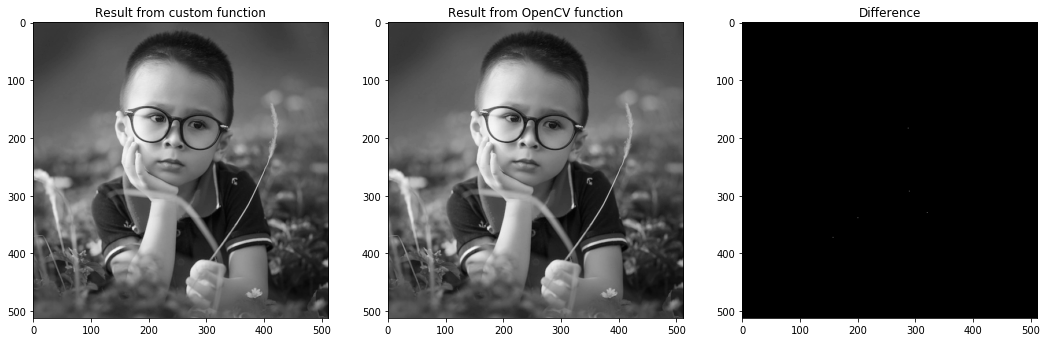

In [11]:
plt.figure(figsize=(18,12))
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(gray,cmap="gray")
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(gray_cv,cmap="gray")
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(gray-gray_cv),cmap="gray")
plt.show()

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### <font style="color:rgb(50,120,229)">Convert BGR image to HSV image</font>
- Input: image in BGR mode
- Output: image in HSV mode

For your convenience, we have added the conversion formula below
![BGR to HSV formula](https://www.dropbox.com/s/btdrk2qxd9knav1/bgr2hsv_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

You can assume we are working with 8 bit images.

In [85]:
cv_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H,S,V = cv2.split(cv_hsv)
V

array([[ 74,  74,  73, ...,  68,  68,  68],
       [ 74,  73,  73, ...,  68,  68,  68],
       [ 73,  73,  73, ...,  68,  68,  69],
       ...,
       [112, 112, 113, ...,  51,  44,  40],
       [112, 112, 113, ...,  56,  48,  47],
       [112, 112, 113, ...,  66,  56,  58]], dtype=uint8)

In [84]:
img_float = img/255.0
B,G,R = cv2.split(img_float)
V = np.maximum.reduce([R,G,B])
min_RGB = np.minimum.reduce([R,G,B])
S = np.where(V==0, 0, ((V-min_RGB)/V))
V_is_R = 60*(G-B)/(V-min_RGB)
V_is_G = 120+60*(B-R)/(V-min_RGB)
V_is_B = 240+60*(R-G)/(V-min_RGB)
H = np.where(V==R, V_is_R, 
             np.where(V==G, V_is_G,V_is_B))
H = np.where(H<0, H+360, H)
V = 255*V
S = 255*S
H = H/2
hsv_img = cv2.merge((H,S,V)).astype(np.uint8)
hsv_img[...,2]

array([[ 74,  74,  73, ...,  68,  68,  68],
       [ 74,  73,  73, ...,  68,  68,  68],
       [ 73,  73,  73, ...,  68,  68,  69],
       ...,
       [112, 112, 113, ...,  51,  44,  40],
       [112, 112, 113, ...,  56,  48,  47],
       [112, 112, 113, ...,  66,  56,  58]], dtype=uint8)

In [ ]:
def convertBGRtoHSV(image):
    ###
    ### YOUR CODE HERE
    ###


In [ ]:
hsv = convertBGRtoHSV(img)

Get the result from OpenCV's `cvtColor` function to verify

In [ ]:
hsv_cv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [ ]:
plt.subplot(1,3,1)
plt.title("Result from custom function")
plt.imshow(hsv[:,:,::-1])
plt.subplot(1,3,2)
plt.title("Result from OpenCV function")
plt.imshow(hsv_cv[:,:,::-1])
plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(np.abs(hsv-hsv_cv)[:,:,::-1])
plt.show()

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
